<div class="alert alert-success">

## Instructions to students

If the assignment was fetched from the assignments tab, do not change the name of the assignment file(s).

### Code answers

In questions that require you to write code, there will be a code cell containing: 
    
<code># YOUR CODE HERE</code>
<br>
<code>raise NotImplementedError()</code>
    
When you are ready to write your answer, delete <code>raise NotImplementedError()</code> and write your code.

### Submitting your work
    
You should save your work before you submit ("Save" icon in top menu).
    
Before you submit, ensure that the notebook can be run from start to finish by pressing the "Restart & Run All" option in the "Kernel" menu above.
    
Once you are ready, go to the assignments tab on the Noteable landing page and click "Submit" on the relevant assignment.

</div>

**Question 10**: Use the Verlet method (see script, section 5.3.1, from page 76 - note that the expression F/m in that section is, of course, the acceleration, the second order derivatives as shown below as ODE's) to calculate the orbit of the Earth around the Sun. The equations of motion for the position $(x(t),y(t))$ of the planet in its orbital plane are: $$\frac{d^{2}x(t)}{dt^{2}}=-G\,M\,\frac{x(t)}{r^{3}},\;\frac{d^{2}y(t)}{dt^{2}}=-G\,M\,\frac{y(t)}{r^{3}},$$ where $r=\sqrt{x^{2}+y^{2}}$.

**Task**: Calculate the orbit of the Earth around the Sun in steps of one hour for a total period of three years. Use the solution for the orbit, $r(t)$, and the velocity, $v(t)$, to calculate additionally the potential and kinetic energy of Earth at each evaluation point. Create a function `potentialEnergy(r,par)` and a function `kineticEnergy(v,par)` which implement these requested calculations separately from solving the ODE's and can be called from tests. Also create a function `solve(par)` which returns the value arrays for $r(t)$ and $v(t)$ as a tuple such that the tests can call `solve(par)` and obtain the results. Note that the potential energy depends only on the Earth location, $r(t)$, and its kinetic energy only on its velocity, $v(t)$. The variable `par` should be a tuple containing the required constant values in order `(G,M,m)`, see Data below.

**Data**: Use $G=6.6738\times{}10^{-11}$ m$^{3}$kg$^{-1}$s$^{-2}$ as Newton's gravitational constant, $M=1.9891\times{}10^{30}$ kg as mass of the Sun. For Earth mass, use $m=5.9722\times{}10^{24}$ kg. The initial conditions should be $r_{0}=(1.521\times{}10^{11},0)$ m and $v_{0}=(0,2.9291\times{}10^{4})$ ms$^{-1}$. Time evaluation points are in the task description and note that you work in SI units.

Create two plots: **(a)** draw the kinetic energy, potential energy and total energy, superimposed on a single canvas and observe how the kinetic and potential energies change as a function of time while the total energy appears to be constant. Note that working in SI units means you will get large numbers of the order $10^{33}$ J.

**(b)** Plot only the total energy as a function of time and observe the oscillating character while the mean remains constant to high precision which demonstrates the inherent energy conservation of the Verlet method.

**Note**: you may wish to solve the problem using `solve_ivp()` but that is not recommended. It is entirely possible and possibly illuminating in comparison(!) to the Verlet method but effectively similar effort for worse results. The tests are likely to fail and deduct marks for this case.

Hint for non-physicists: bound system energies are traditionally considered to be negative.

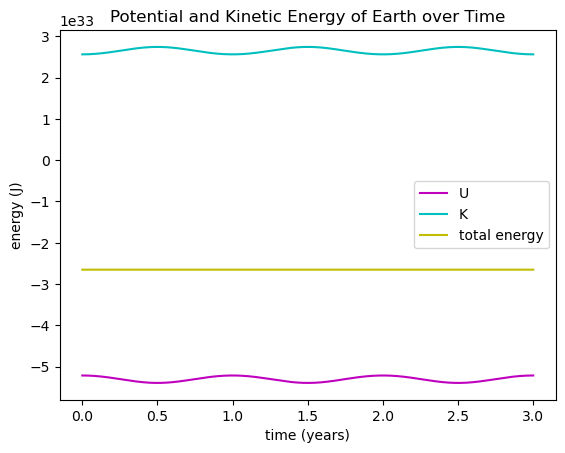

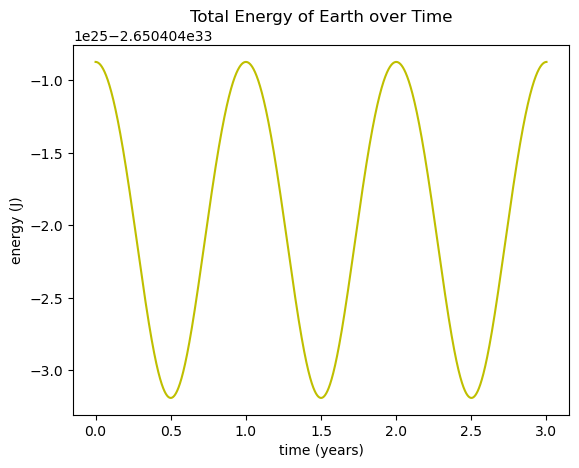

In [1]:
# YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt

# need u = x' and w = y' so that u' = -GMx/r^3 and w' = -GMy/r^3
# assuming 24 hours a day, 365 days a year, we have a total of 26280 hours, which in SI units is 9.4608 x10^7 seconds

def a(r): # not actually the accelertaion as it still needs to be multiplied by -GM, can directly put into solve() if needed
    normr = np.linalg.norm(r)
    return -r/(normr**3)

# U = -mGM/r where r is actually the radius or the norm of our vector r = [x,y]
def potentialEnergy(r,par):
    G = par[0]
    M = par[1]
    m = par[2]
    U = []
    for i in range(26281):
        ri = r[:,i]
        U.append(-m*G*M/(np.linalg.norm(ri)))
    return np.array(U)

# K = mGM/2r where like before r is ||r||_2
def kineticEnergy(v,par):
    G = par[0]
    M = par[1]
    m = par[2]
    K = []
    for i in range(26281):
        vi = v[:,i]
        K.append((m*(np.linalg.norm(vi))**2)/2)
    return np.array(K)

def solve(par):
    x = np.zeros(26281)
    y = np.zeros(26281)
    u = np.zeros(26281)
    w = np.zeros(26281)
    x[0] = 1.521e11 #[m]
    y[0] = 0 #doesn't make a difference but useful to see the logic
    u[0] = 0 #ditto
    w[0] = 2.9291e4 #[ms^-1]
    G = par[0]
    M = par[1]
    m = par[2]
    timestep = 3600 #[s]
    
    # starter
    vhalf = np.array([u[0],w[0]]) + 0.5 * timestep * a(np.array([x[0],y[0]])) * G*M
    
    # loop
    for i in range(26280):
        x[i+1] = x[i] + timestep * vhalf[0]
        y[i+1] = y[i] + timestep * vhalf[1]
        k = timestep * a(np.array([x[i+1],y[i+1]])) * G*M
        u[i+1] = vhalf[0] + 0.5 * k[0]
        w[i+1] = vhalf[1] + 0.5 * k[1]
        vhalf += k
        
    r = np.array([x,y])
    v = np.array([u,w])
    return (r, v)

# main code
G = 6.6738e-11
M = 1.9891e30
m = 5.9722e24
par = np.array([G,M,m])

(r, v) = solve(par)
# print(r)
# print(v)

U = potentialEnergy(r,par)
K = kineticEnergy(v,par)
total_energy = U+K
mean_energy = np.mean(total_energy)
#I normalised to make it easier to read but changed it back
#diff_energy = total_energy-mean_energy
#sd_energy = np.std(total_energy)
#norm_energy = diff_energy/sd_energy

# plt.figure(figsize = (6,6))
# plt.plot(r[0,:],r[1,:])
# plt.show()

#    assuming 24 hours a day, 365 days a year, we have a total of 26280 hours, which in SI units is 9.4608 x10^7 seconds
time = np.linspace(0,3.0,26281)
plt.plot(time, U, color = 'm', label = 'U')
plt.plot(time, K, color = 'c', label = 'K')
plt.plot(time, total_energy, color = 'y', label = 'total energy')
plt.legend()
plt.xlabel('time (years)')
plt.ylabel('energy (J)')
plt.title('Potential and Kinetic Energy of Earth over Time')
plt.show()

plt.plot(time,total_energy, color = 'y')
plt.xlabel('time (years)')
plt.ylabel('energy (J)')
plt.title('Total Energy of Earth over Time')
plt.show()

Manual plot marking with feedback where appropriate.

In [2]:
# Test, do not delete

In [3]:
# Test cell, do not delete

### Tests 2 marks; Plots - 3 marks